In [1]:
import os
from glob import glob

# import gui tkinter
from tkinter import Tk
import tkinter.filedialog as tkfd

# to do the converstion
import shapefile
from json import dumps

# for inline visualisation
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

code to convert single file

>read the shapefile
```
reader = shapefile.Reader("C:/WERKMAP/Anaconda/split_by_attributes/SelPoelen_Anaconda_testfile.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", geometry=geom, properties=atr)) 
```  
>write the GeoJSON file
```
geojson = open("C:/WERKMAP/Anaconda/split_by_attributes/SelPoelen_Anaconda_testfile.json", "w")
geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
geojson.close()
```

Set input (shapefiles) and output (geojson) directory

In [2]:
root = Tk()
input_directory = tkfd.askdirectory(title = "Select input directory", 
                         initialdir = "C:/")
root.destroy()

In [3]:
input_directory

'C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles'

In [4]:
root = Tk()
output_directory = tkfd.askdirectory(title = "Select output directory", 
                         initialdir = "C:/")
root.destroy()

In [5]:
output_directory

'C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson'

Convert shapefiles to GeoJSON

Let's have a look at the shapefiles in the directory

In [6]:
for path in glob(os.path.join(input_directory,"**", "*.shp"),recursive=True):
    print(path)

C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP00.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP01.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP02.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP03.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP04.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP05.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP06.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP07.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP08.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP09.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP10.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP11.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\GCP12.shp

In [7]:
for path in glob(os.path.join(input_directory,"**", "*.shp"),recursive=True):
    basename = os.path.basename(path)
    fileName, fileExtention = os.path.splitext(basename)
    reader = shapefile.Reader(path)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]
    buffer = []
    for sr in reader.shapeRecords():
        atr = dict(zip(field_names, sr.record))
        geom = sr.shape.__geo_interface__
        buffer.append(dict(type="Feature", geometry=geom, properties=atr)) 
   
   # write the GeoJSON file
    geojson = open(output_directory + "/" + fileName + ".json", "w")
    geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
    geojson.close()

Let's check the output folder

In [8]:
for path in glob(os.path.join(output_directory,"**", "*.json"),recursive=True):
    print(path)

C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP00.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP01.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP02.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP03.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP04.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP05.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP06.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP07.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP08.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP09.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP10.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP11.json
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\GCP12.json
C:/WERKMAP/Anaconda/shapefile_geojson_

In [9]:
output_check = gpd.read_file("C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson/GCP14.json")

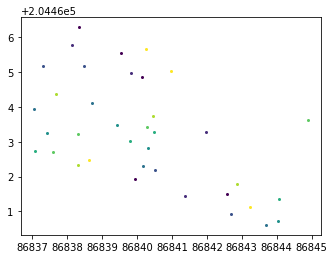

In [10]:
output_check.plot()